In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import express as px, graph_objects as go

In [71]:
ESTADO_ORD_EMBARALHADO = 'Embaralhado'
ESTADO_ORD_NAO_ASCENDENTE = 'Não-ascendente'
ESTADO_ORD_ORDENADO = 'Ordenado ou quase ordenado'

tipos_de_casos_de_teste = {
    ('vazio',): ['Vetor vazio'] * 2 + [ESTADO_ORD_ORDENADO],
    ('auto_inteiros_aleatorios_',): ['Numérico', 'Números inteiros aleatórios', ESTADO_ORD_EMBARALHADO],
    ('auto_inteiros_em_ordem_nao_ascendente_',): ['Numérico', 'Números inteiros em ordem não-ascendente', ESTADO_ORD_NAO_ASCENDENTE],
    ('auto_inteiros_quase_ordenados_', '100.0%'): ['Numérico', 'Números inteiros ordenados', ESTADO_ORD_ORDENADO],
    ('auto_inteiros_quase_ordenados_', '98.0%'): ['Numérico', 'Números inteiros quase ordenados', ESTADO_ORD_ORDENADO],
    ('auto_inteiros_identicos_',): ['Numérico', 'Vetor de números inteiros com todos os elementos iguais a 37', ESTADO_ORD_ORDENADO],
    ('auto_nomes_sisu_embaralhados',): ['String', 'Nomes de pessoas em caixa alta embaralhados', ESTADO_ORD_EMBARALHADO],
    ('auto_nomes_sisu_quase_ordenados',): ['String', 'Nomes de pessoas em caixa alta quase ordenados', ESTADO_ORD_ORDENADO]
}

In [72]:
df = pd.read_csv('dataset_final.csv')
df['caso'] = df['caso'].str.replace('vazio.in', 'vazio.0.in')
df['Tamanho'] = df['caso'].str.split('.').str[-2].astype(int)
df['Tipo de Caso'] = [None] * len(df)
df['Subtipo de Caso'] = [None] * len(df)
df['Estado de ordenação'] = [None] * len(df)
df['algoritmo'] = df['algoritmo'].str.capitalize()
df = df.rename({'caso': 'Caso de Teste', 'algoritmo': 'Algoritmo', 'linguagem': 'Linguagem', 'tempo': 'Tempo'}, axis=1)

for idx, row in df.iterrows():
    for padrao, tipologia in tipos_de_casos_de_teste.items():
        if all(x in row['Caso de Teste'] for x in padrao):
            df.loc[idx, 'Tipo de Caso'] = tipologia[0]
            df.loc[idx, 'Subtipo de Caso'] = tipologia[1]
            df.loc[idx, 'Estado de ordenação'] = tipologia[2]

df

,Algoritmo,Linguagem,Caso de Teste,Tempo,Tamanho,Tipo de Caso,Subtipo de Caso,Estado de ordenação
0,Radix,Java,vazio.0.in,0.0725,0,Vetor vazio,Vetor vazio,Ordenado ou quase ordenado
1,Radix,Java,auto_nomes_sisu_quase_ordenados.5838.in,0.1825,5838,String,Nomes de pessoas em caixa alta quase ordenados,Ordenado ou quase ordenado
2,Radix,Java,auto_nomes_sisu_embaralhados.5838.in,0.2000,5838,String,Nomes de pessoas em caixa alta embaralhados,Embaralhado
3,Radix,Java,auto_nomes_sisu_quase_ordenados.5720.in,0.1700,5720,String,Nomes de pessoas em caixa alta quase ordenados,Ordenado ou quase ordenado
4,Radix,Java,auto_nomes_sisu_embaralhados.5720.in,0.1750,5720,String,Nomes de pessoas em caixa alta embaralhados,Embaralhado
...,...,...,...,...,...,...,...,...
1660,Radix,Python,auto_inteiros_quase_ordenados_0-1000000_100.00...,0.0325,5000,None,None,None
1661,Radix,Python,auto_inteiros_quase_ordenados_0-1000000_98.00%...,0.0325,5000,None,None,None
1662,Radix,Python,auto_inteiros_identicos_37.5000.in,0.0225,5000,Numérico,Vetor de números inteiros com todos os element...,Ordenado ou quase ordenado
1663,Radix,Python,auto_inteiros_em_ordem_nao_ascendente_0-100000...,0.0500,5000,Numérico,Números inteiros em ordem não-ascendente,Não-ascendente


Text(0, 0.5, 'Tempo médio de execução (s)')

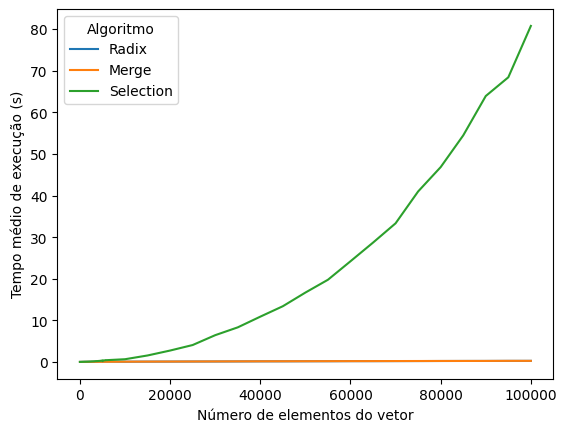

In [73]:
sns.lineplot(
    df,
    x='Tamanho', y='Tempo', hue='Algoritmo', errorbar=None)
plt.xlabel('Número de elementos do vetor')
plt.ylabel('Tempo médio de execução (s)')

In [74]:
df[df['Subtipo de Caso'] == 'Nomes de pessoas em caixa alta embaralhados']['Tamanho'].max()

5838

Text(0, 0.5, 'Tempo médio de execução (s)')

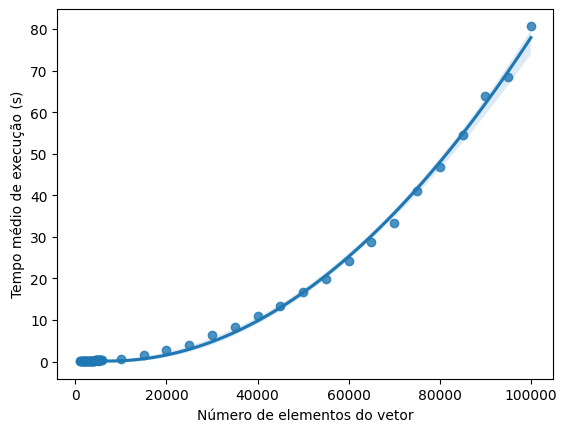

In [75]:
df_curva = df[(df['Algoritmo'] == 'Selection')].groupby('Tamanho')['Tempo'].mean().reset_index().loc[1:]

df_curva

sns.regplot(
    df_curva,
    x='Tamanho', y='Tempo', order=2)
plt.xlabel('Número de elementos do vetor')
plt.ylabel('Tempo médio de execução (s)')

Text(0, 0.5, 'Tempo médio de execução (s)')

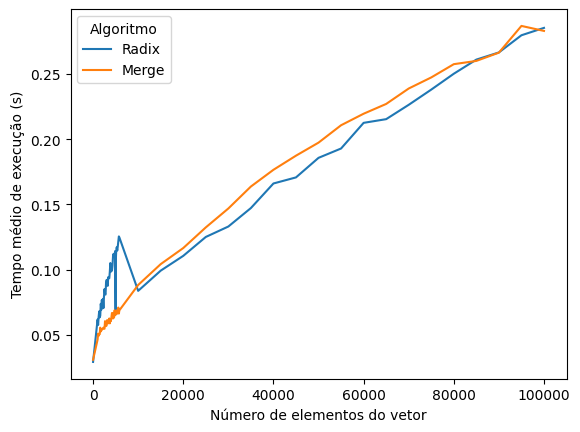

In [76]:
sns.lineplot(
    df[df['Algoritmo'] != 'Selection'],
    x='Tamanho', y='Tempo', hue='Algoritmo', errorbar=None)
plt.xlabel('Número de elementos do vetor')
plt.ylabel('Tempo médio de execução (s)')

Text(0, 0.5, 'Tempo médio de execução (s)')

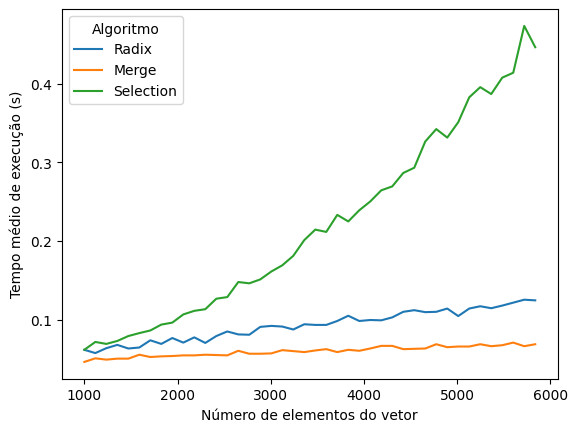

In [77]:
sns.lineplot(
    df[df['Caso de Teste'].str.contains('auto_nomes')],
    x='Tamanho', y='Tempo', hue='Algoritmo', errorbar=None)
plt.xlabel('Número de elementos do vetor')
plt.ylabel('Tempo médio de execução (s)')

Text(0, 0.5, 'Tempo médio de execução (s)')

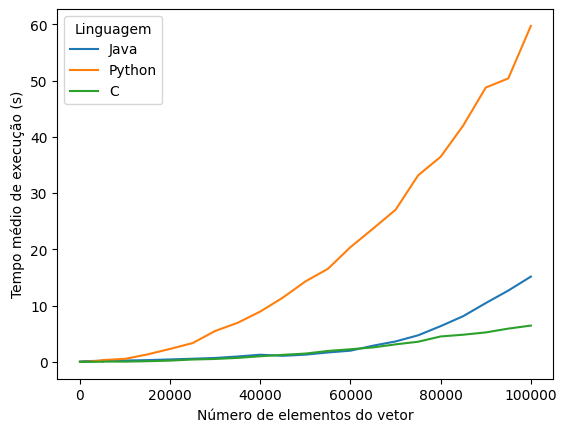

In [78]:
sns.lineplot(
    df,
    x='Tamanho', y='Tempo', hue='Linguagem', errorbar=None)
plt.xlabel('Número de elementos do vetor')
plt.ylabel('Tempo médio de execução (s)')

In [79]:
df[df['Tamanho'] <= 5900].groupby(['Algoritmo', 'Tipo de Caso'])['Tempo'].mean().reset_index()

,Algoritmo,Tipo de Caso,Tempo
0,Merge,Numérico,0.069167
1,Merge,String,0.059772
2,Merge,Vetor vazio,0.030833
3,Radix,Numérico,0.066389
4,Radix,String,0.092500
5,Radix,Vetor vazio,0.029167
6,Selection,Numérico,0.218889
7,Selection,String,0.219226
8,Selection,Vetor vazio,0.030000


In [80]:
df[df['Tamanho'] <= 5900].groupby(['Algoritmo', 'Tipo de Caso'])['Tempo'].quantile(0.25).reset_index()

,Algoritmo,Tipo de Caso,Tempo
0,Merge,Numérico,0.002500
1,Merge,String,0.000000
2,Merge,Vetor vazio,0.007500
3,Radix,Numérico,0.000000
4,Radix,String,0.005000
5,Radix,Vetor vazio,0.007500
6,Selection,Numérico,0.052500
7,Selection,String,0.074375
8,Selection,Vetor vazio,0.007500


In [81]:
df[df['Tamanho'] <= 5900].groupby(['Algoritmo', 'Tipo de Caso'])['Tempo'].quantile(0.50).reset_index()

,Algoritmo,Tipo de Caso,Tempo
0,Merge,Numérico,0.02750
1,Merge,String,0.02500
2,Merge,Vetor vazio,0.01500
3,Radix,Numérico,0.03500
4,Radix,String,0.11625
5,Radix,Vetor vazio,0.01500
6,Selection,Numérico,0.20750
7,Selection,String,0.17000
8,Selection,Vetor vazio,0.01500


In [82]:
df[df['Tamanho'] <= 5900].groupby(['Algoritmo', 'Tipo de Caso'])['Tempo'].quantile(0.75).reset_index()

,Algoritmo,Tipo de Caso,Tempo
0,Merge,Numérico,0.167500
1,Merge,String,0.142500
2,Merge,Vetor vazio,0.046250
3,Radix,Numérico,0.157500
4,Radix,String,0.158125
5,Radix,Vetor vazio,0.043750
6,Selection,Numérico,0.377500
7,Selection,String,0.263125
8,Selection,Vetor vazio,0.045000


Text(0, 0.5, 'Tempo de Execução (s)')

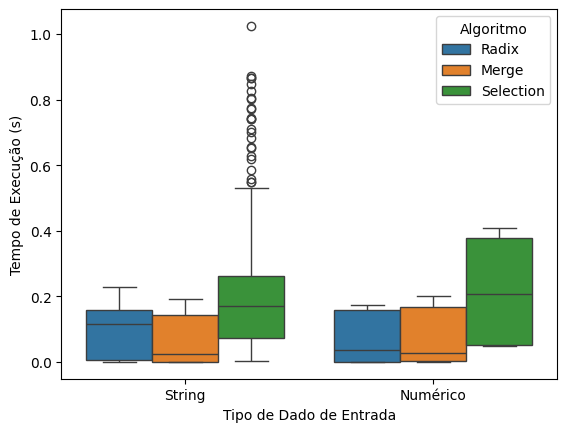

In [83]:
df_scaled = df[(df['Tipo de Caso'] != 'Vetor vazio') & (df['Tamanho'] <= 5900)].copy()
sns.boxplot(df_scaled, x='Tipo de Caso', y='Tempo', hue='Algoritmo')
plt.xlabel('Tipo de Dado de Entrada')
plt.ylabel('Tempo de Execução (s)')

Text(0, 0.5, 'Tempo de Execução (s)')

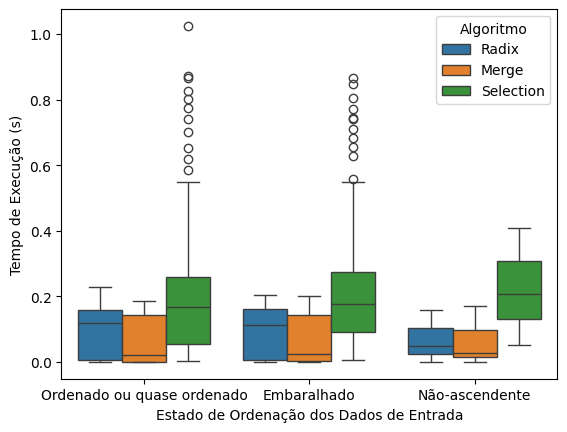

In [87]:
df_scaled = df[(df['Tipo de Caso'] != 'Vetor vazio') & (df['Tamanho'] <= 5900)].copy()
sns.boxplot(df_scaled, x='Estado de ordenação', y='Tempo', hue='Algoritmo')
plt.xlabel('Estado de Ordenação dos Dados de Entrada')
plt.ylabel('Tempo de Execução (s)')